# <font color='red'> Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear). 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Use GridSearchCv and cross-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelilzed Support Vector Machine (rbf, poly, and linear), Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

# Grading rubric
|Description | Points|
|---|---|
|Data preprocessing | 5 points|
|Regression with cross-validation| 7 points|
|Classification with cross validation | 8 points|
|Total | 20 points|

In [1]:
Group = 'Group 3'
Name = 'My Pham (Classification), Monica Kulkarnk (Regression)'

### Sources of Datasets

1. Regression: Bike Sharing Data ('bikesharing.csv')

Source: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing

Introduction: 

This data set, consisting of 17,379 rows and 17 columns, contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bike-share system with the corresponding weather and seasonal information. Bike-sharing rental process is highly correlated to the environmental and seasonal settings.

2. Classification: Heart Disease Prediction ('framingham_heart_disease.csv')

Source: https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

Introduction: 

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation. Source The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Column description:
- male: 0 = Female; 1 = Male (boolean)
- age: age of patient at exam time (integer)
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college (ordinal)
- currentSmoker: 0 = nonsmoker; 1 = smoker (boolean)
- cigsPerDay: number of cigarettes smoked per day (estimated average) (float)
- BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications (boolean)
- prevalentStroke: 0 = previously had no stroke; 1 = previously had a stroke (boolean)
- prevalentHyp: 0 = patient was not hypertensive; 1 = patient was hypertensive (boolean)
- diabetes: 0 = No; 1 = Yes (boolean)
- totChol: total cholesterol level (mg/dL) (float)
- sysBP: systolic blood pressure (mmHg) (float)
- diaBP: diastolic blood pressure (mmHg) (float)
- BMI: Body Mass Index = Weight (kg)/Height(meter-squared) (float)
- heartRate: Beats/Min (Ventricular) (float)
- glucose: glucose level (mg/dL) (float)
- TenYearCHD: 10 year risk of coronary heart disease CHD (0 = No; 1 = Yes) (boolean)

## Part 1: Regression Task:

### Data Preprocess

1. Data exploration

In [2]:
# Import libraris and dataset
import numpy as np
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv('bikesharing.csv')

2. Missing data

In [3]:
df.isnull().sum()
df = df.fillna(df.mean())

In [4]:
df = df.drop(['casual','instant','dteday','registered'],axis = 1)

seed = 1498920
np.random.seed(seed)

In [5]:
bool_index = np.random.rand(df.shape[0]) < 0.7
train = df[bool_index].reset_index(drop = True)
test = df[~bool_index].reset_index(drop = True)

In [6]:
train_x = train.iloc[:,0:12]
train_y = train.iloc[:,12]

test_x = test.iloc[:,0:12]
test_y = test.iloc[:,12] 

3. Data scaling

In [7]:
scaler = preprocessing.StandardScaler()

x_scaled = scaler.fit_transform(train_x)    
train_x_scaled = pd.DataFrame(x_scaled,columns = list(train_x.columns)) 
train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.000000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.000000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.000000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.000000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.000000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.089600,1
6,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.190343,3
7,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.190343,8
8,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.190343,14
9,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.253700,36


In [8]:
test_x_scaled = scaler.fit_transform(test_x)    
test_x_scaled = pd.DataFrame(test_x_scaled,columns = list(test_x.columns)) 

### Regression models using GridSearchCV and cross-validation

1. SVM kernel (linear, poly, rbf)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svclassifier = SVR()
param_grid = {'kernel' : ['linear','poly', 'rbf']}

grid_search_SVR = GridSearchCV(estimator = svclassifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 10,return_train_score = True)


grid_search_SVR.fit(train_x_scaled, train_y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   28.6s remaining:   57.4s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   30.0s remaining:   37.6s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   43.5s remaining:   34.8s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   44.2s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   51.1s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   59.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   59.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=10)

In [10]:
import matplotlib.pyplot as plt

results = grid_search_SVR.cv_results_
num_param = len(list(param_grid.values())[0])
train_scores = np.hstack((results['split0_train_score'].reshape((num_param,1)),results['split1_train_score'].reshape((num_param,1)),results['split2_train_score'].reshape((num_param,1))))
val_scores = np.hstack((results['split0_test_score'].reshape((num_param,1)),results['split1_test_score'].reshape((num_param,1)),results['split2_test_score'].reshape((num_param,1))))

In [11]:
train_mean = np.mean(train_scores,axis = 1)
val_mean = np.mean(val_scores,axis = 1)  
width = 0.6

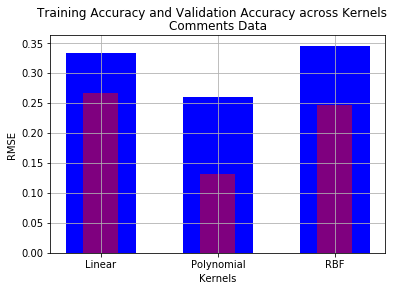

In [12]:
plt.grid(True)
plt.bar(['Linear','Polynomial','RBF'], train_mean, width=width, 
        color='b', label='Training Accuracy')
plt.bar(['Linear','Polynomial','RBF'], val_mean, 
        width=0.5*width, color='r', alpha=0.5, label='Validation Accuracy')
plt.title('Comments Data')
plt.suptitle('Training Accuracy and Validation Accuracy across Kernels')
plt.ylabel('RMSE')
plt.xlabel('Kernels')
plt.show()

In [13]:
SVM_final = grid_search_SVR.best_estimator_
pred_test_y = SVM_final.predict(test_x_scaled) 

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rms = sqrt(mean_squared_error(test_y, pred_test_y))

2. KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
param_grid = {'n_neighbors' : [i for i in range(1,21,2)]}

grid_search_KNN = GridSearchCV(estimator = knn_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 10,return_train_score = True)

grid_search_KNN.fit(train_x_scaled, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   41.4s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=10)

In [16]:
best_k = grid_search_KNN.best_params_['n_neighbors']

results = grid_search_KNN.cv_results_
num_param = len(list(param_grid.values())[0])
train_scores = np.hstack((results['split0_train_score'].reshape((num_param,1)),results['split1_train_score'].reshape((num_param,1)),results['split2_train_score'].reshape((num_param,1))))
val_scores = np.hstack((results['split0_test_score'].reshape((num_param,1)),results['split1_test_score'].reshape((num_param,1)),results['split2_test_score'].reshape((num_param,1))))

In [17]:
train_mean = np.mean(train_scores,axis = 1)
val_mean = np.mean(val_scores,axis = 1)  
width = 0.6

Text(0.5, 0, 'Number of Neighbors')

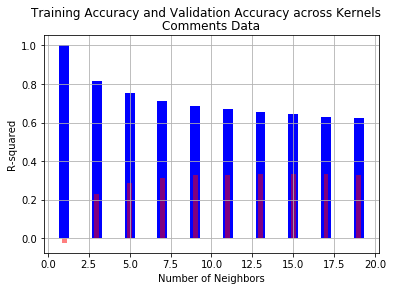

In [18]:
plt.grid(True)
plt.bar( [i for i in range(1,21,2)], train_mean, width=width, 
        color='b', label='Training Accuracy')
plt.bar([i for i in range(1,21,2)], val_mean, 
        width=0.5*width, color='r', alpha=0.5, label='Validation Accuracy')
plt.title('Comments Data')
plt.suptitle('Training Accuracy and Validation Accuracy across Kernels')
plt.ylabel('R-squared')
plt.xlabel('Number of Neighbors')

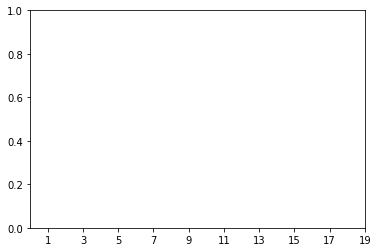

In [19]:
plt.xticks([i for i in range(1,21,2)])

plt.show()

In [20]:
KNN_final = grid_search_KNN.best_estimator_
pred_test_y = KNN_final.predict(test_x_scaled)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test_y, pred_test_y))

3. Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(train_x_scaled,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
import statsmodels.formula.api as sm

linreg_model = sm.OLS(train_y,train_x_scaled).fit()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [ ]:
#results = linreg_model.fit()
#results.params

In [ ]:
linreg_model.summary()

pred_test_y = linreg_model.predict(test_x_scaled)

In [ ]:
rms = sqrt(mean_squared_error(test_y, pred_test_y))

In [ ]:
from sklearn.base import BaseEstimator

class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [ ]:
poly_reg = PolynomialRegression()
degrees = np.arange(1, 8)
grid_search_poly = GridSearchCV(poly_reg,
                        param_grid={'deg': degrees},
                        scoring='neg_mean_squared_error')
grid_search_poly.fit(train_y,train_x_scaled)
grid_search_poly.best_estimator_

In [ ]:
best_degree = grid_search_poly.best_params_['deg']
poly_final = grid_search_poly.best_estimator_

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=best_degree)
train_x_scaled_poly = poly.fit_transform(train_x_scaled)
poly_lr = LinearRegression()
poly_lr.fit(train_x_scaled_poly, train_y)

In [ ]:
test_x_scaled_poly = poly.fit_transform(test_x_scaled)

pred_test_y = poly_lr.predict(test_x_scaled_poly)
rms = sqrt(mean_squared_error(test_y, pred_test_y))

4. Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge()

param_grid = {'alpha' : np.arange(0.5,2.0,0.2)}

grid_search_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 10,return_train_score = True)

grid_search_ridge.fit(train_x_scaled, train_y)

In [ ]:
from math import sqrt

best_alpha = grid_search_ridge.best_params_['alpha']

ridge_final = grid_search_ridge.best_estimator_
pred_test_y = ridge_final.predict(test_x_scaled)

rms = sqrt(mean_squared_error(test_y, pred_test_y))

5. Lasso

In [ ]:
lasso_model = Lasso()

param_grid = {'alpha' : np.arange(0.5,2.0,0.2)}

grid_search_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 10,return_train_score = True)

grid_search_lasso.fit(train_x_scaled, train_y)

In [ ]:
best_alpha = grid_search_lasso.best_params_['alpha']

lasso_final = grid_search_lasso.best_estimator_
pred_test_y = lasso_final.predict(test_x_scaled)

rms = sqrt(mean_squared_error(test_y, pred_test_y))

Result Table

In [ ]:
data = {'Model Selection':["KNN", "Linear Regression", "LinearSVR", "SVR Kernel RBF", "SVR kernel poly", "SVR Kernel Linear", "Polynomial Regression", "Ridge Regression", "Lasso Regression"],
        'Best parameters':[{'n_neighbors': 15, 'weights': 'uniform'},{'C': 1, 'penalty': 'l1'},{'C': 5},{'C': 0.01, 'gamma': 0.01},{'C': 10},{'C': 0.001}, {'Degree': 5}, {'Alpha':1.8}, {'Alpha':0.7}],
       'Best cross-validation RMSE':[116, 224, 189, 154, 162, 168, 324, 186, 172]}

df = pd.DataFrame(data)
df.sort_values(['Best cross-validation RMSE'], ascending=True)

KNN is the best model as it provides the best model results.

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors= 15)
knn_model.fit(train_x_scaled,train_y)

pred_test_y = knn_model.predict(test_x_scaled)

rms = sqrt(mean_squared_error(test_y, pred_test_y))

## Part 2: Classification Task:

### Data Preprocess

1. Data exploration

In [1]:
# Surpress warnings and import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline 

In [2]:
# Import dataset
hd = pd.read_csv('framingham_heart_disease.csv')
hd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print("The size of the dataset is: ", hd.shape) # Number of rows and columns met the condition

The size of the dataset is:  (4238, 16)


In [4]:
print("Column names are: ", hd.keys())

Column names are:  Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [5]:
# Rename Male column to Sex
hd.rename(columns={'male':'sex'}, inplace=True)
hd.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Male column needs to be renamed to Sex so that Male = 1, Female = 0.

2. Missing data

In [6]:
# Count missing data in each column
total = hd.isnull().sum().sort_values(ascending = False)
percent = 100*total/len(hd)
missingCol = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missingCol

,Total,Percent
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596
TenYearCHD,0,0.000000
diaBP,0,0.000000
sysBP,0,0.000000


In [7]:
# Count number of rows with missing data
count=0
for i in hd.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Number of rows with missing data is: ', count)
print('Percentage of rows with missing data compared to the entire dataset is: ',round((count/len(hd.index))*100))

Number of rows with missing data is:  582
Percentage of rows with missing data compared to the entire dataset is:  14


In [8]:
# Replace missing data with median of columns
hd.fillna(hd.median(), inplace=True)
hd.head(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Missing data may impact the results of the models so they can be replaced with the median of each column.

In [9]:
# Check for missing data in the updated dataset
hd.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
hd.dtypes # Data have been converted to numeric types

sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [11]:
# Description of updated dataset
hd.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
sex                4238 non-null int64
age                4238 non-null int64
education          4238 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4238 non-null float64
BPMeds             4238 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4238 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4238 non-null float64
heartRate          4238 non-null float64
glucose            4238 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


3. Data visualization

In [13]:
# Correlation matrix
corr = hd.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1,-0.02898,0.01721,0.1976,0.3156,-0.05154,-0.004546,0.005313,0.01571,-0.06955,-0.03599,0.05793,0.08165,-0.1166,0.01007,0.08843
age,-0.02898,1,-0.1635,-0.2137,-0.1918,0.121,0.05765,0.3072,0.1013,0.2601,0.3943,0.2061,0.1352,-0.01285,0.1178,0.2253
education,0.01721,-0.1635,1,0.01827,0.007618,-0.01036,-0.03515,-0.08102,-0.03814,-0.02236,-0.1283,-0.06172,-0.1355,-0.05368,-0.03398,-0.05338
currentSmoker,0.1976,-0.2137,0.01827,1,0.7602,-0.04836,-0.03299,-0.1033,-0.0443,-0.04647,-0.1302,-0.1077,-0.1672,0.06233,-0.05518,0.01946
cigsPerDay,0.3156,-0.1918,0.007618,0.7602,1,-0.04467,-0.03224,-0.06505,-0.03615,-0.02698,-0.08838,-0.05669,-0.09221,0.07385,-0.05686,0.05886
BPMeds,-0.05154,0.121,-0.01036,-0.04836,-0.04467,1,0.1146,0.2587,0.05139,0.07858,0.2515,0.1924,0.09958,0.01514,0.04912,0.08642
prevalentStroke,-0.004546,0.05765,-0.03515,-0.03299,-0.03224,0.1146,1,0.07483,0.006949,0.0001226,0.05701,0.04519,0.02426,-0.01767,0.01872,0.06181
prevalentHyp,0.005313,0.3072,-0.08102,-0.1033,-0.06505,0.2587,0.07483,1,0.07781,0.1631,0.6968,0.6158,0.3005,0.1472,0.08357,0.1776
diabetes,0.01571,0.1013,-0.03814,-0.0443,-0.03615,0.05139,0.006949,0.07781,1,0.04012,0.1113,0.05033,0.08603,0.049,0.6065,0.09732
totChol,-0.06955,0.2601,-0.02236,-0.04647,-0.02698,0.07858,0.0001226,0.1631,0.04012,1,0.2075,0.1639,0.1148,0.09054,0.04556,0.08157


In [14]:
# Get list of features
features = hd.drop('TenYearCHD', 1).columns
print(features.tolist())

['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


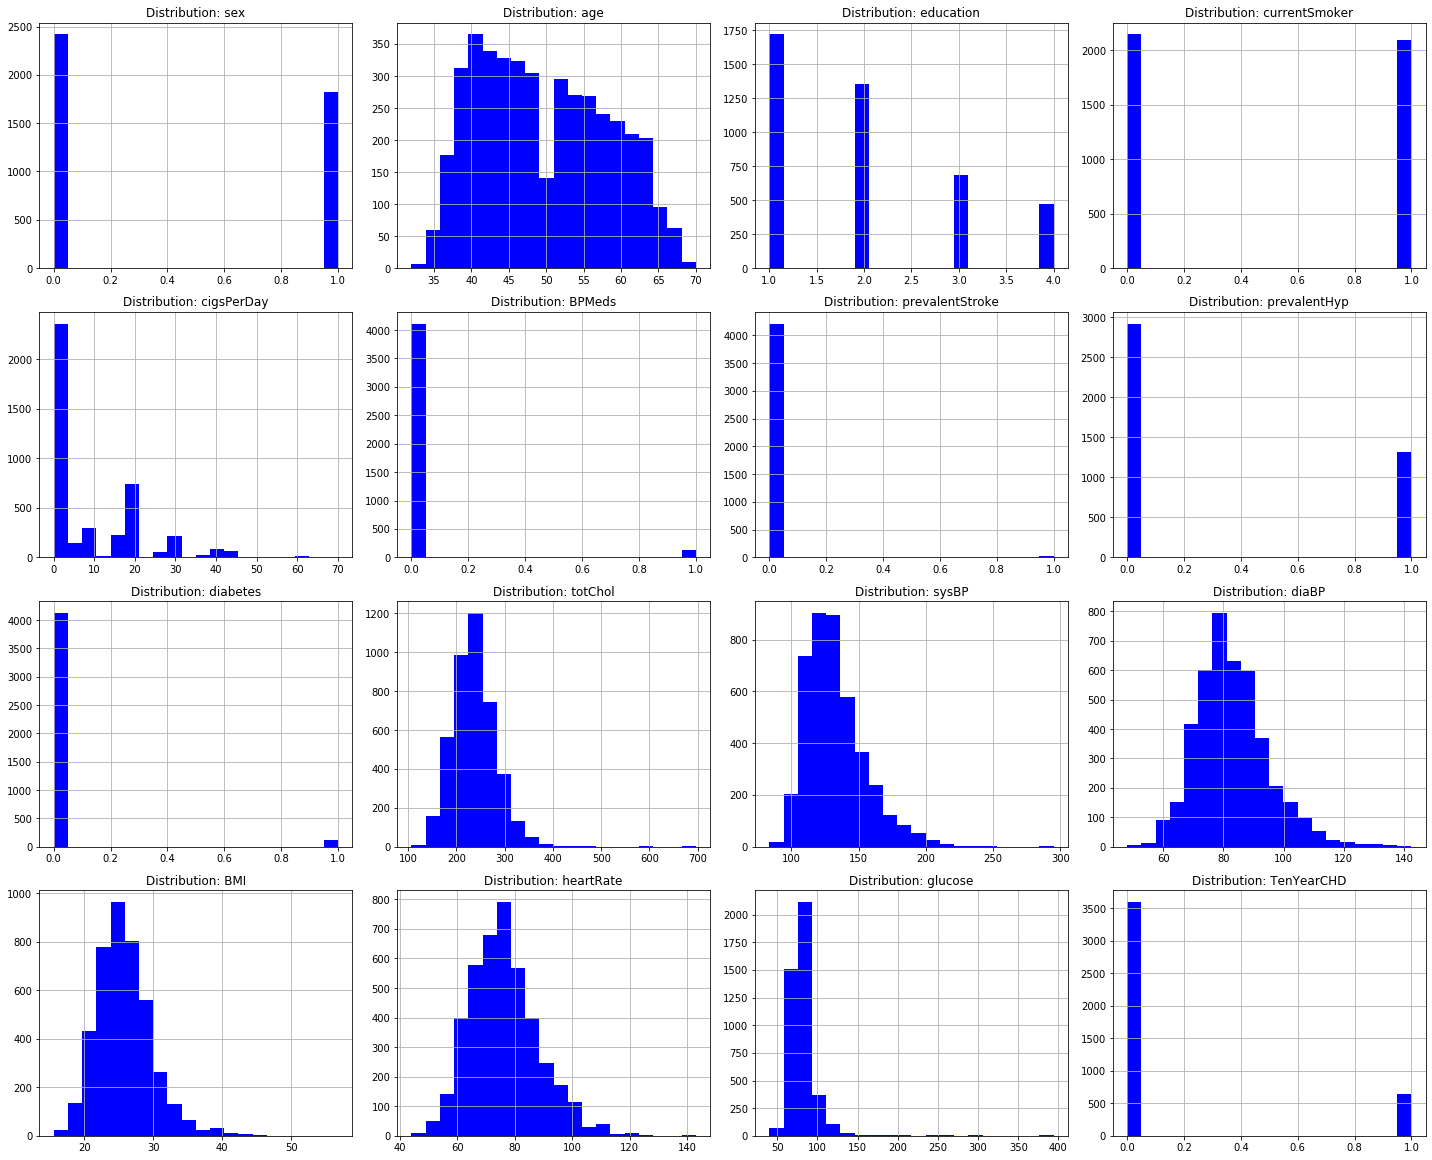

In [15]:
# Histograms for features
def plot_hists(hd, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        hd[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title('Distribution: '+ feature) 
    fig.tight_layout() 
    plt.show()

plot_hists(hd,hd.columns,5,4)

As each feature has a different range of values, data scaling will be necessary.

5. Data scaling

In [16]:
# Separate dataset into X (input features) and y (output label)
X = hd.drop('TenYearCHD',1)
y = hd['TenYearCHD']

Min-Max Scaling is useful in this case as the features have hard boundaries and the technique produces values of range [0,1].

In [17]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Classification models using GridSearchCV and cross-validation

1. KNN Classification

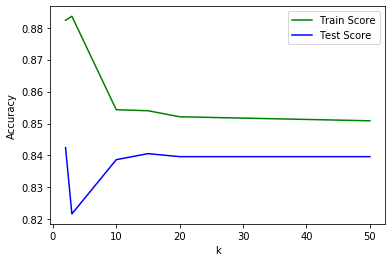

In [18]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

n = [2, 3, 10, 15, 20, 50]
for k in n:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

x_axis = [2, 3, 10, 15, 20, 50]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [19]:
# Gridsearch
knn_param_grid = {'n_neighbors': [2, 3, 5, 10, 15, 20, 50], 'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, return_train_score=True)
knn_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(knn_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_grid_search.best_score_))

# Cross-validation
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(knn_scores.mean()))

Best parameters: {'n_neighbors': 20, 'weights': 'uniform'}
Best cross-validation score: 0.8512
Average cross-validation score: 0.8364


In [20]:
# Convert dataset to a NumPy array
hd.to_numpy()
X = hd.drop('TenYearCHD',1).to_numpy()
y = hd['TenYearCHD'].to_numpy()

# Scale data
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

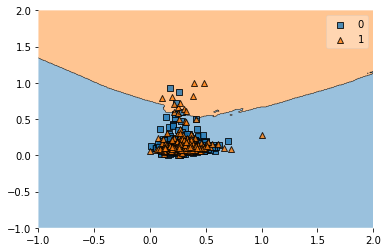

In [21]:
# Best parameters
from mlxtend.plotting import plot_decision_regions

Xt = X_train[:, [9,14]]
yt = y_train

knn_best = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn_best.fit(Xt, yt) 

plot_decision_regions(Xt, yt, clf = knn_best)

2. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

c_range = [0.1, 1, 10]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, random_state=0,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, random_state=0,solver='liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

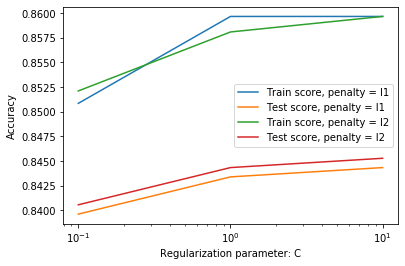

In [23]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [24]:
# Gridsearch
lreg = LogisticRegression()
hyperparameters = dict(C=c_range, penalty=['l1','l2'])
lreg_grid_search = GridSearchCV(LogisticRegression(), hyperparameters, cv=5, return_train_score=True)
lreg_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(lreg_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(lreg_grid_search.best_score_))

# Cross-validation
lreg_scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(lreg_scores.mean()))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.8581


NameError: name 'lreg' is not defined

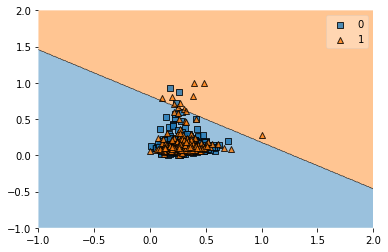

In [28]:
# Best parameters
lreg_best = LogisticRegression(C=1, penalty='l1')
lreg_best.fit(Xt, yt) 

plot_decision_regions(Xt, yt, clf = lreg_best)

3. Linear Support Vector Machine

In [29]:
from sklearn.svm import LinearSVC, SVC

# Gridsearch
Linearsvc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Linearsvc_grid_search = GridSearchCV(LinearSVC(), Linearsvc_param_grid, cv=5, return_train_score=True)
Linearsvc_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(Linearsvc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(Linearsvc_grid_search.best_score_))

# Cross-validation
Linearsvc_scores = cross_val_score(LinearSVC(), X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(Linearsvc_scores.mean()))

Best parameters: {'C': 10}
Best cross-validation score: 0.8537
Average cross-validation score: 0.8534


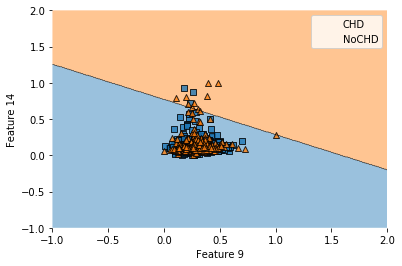

In [30]:
# Best parameters
clf_best = LinearSVC(C=10)
clf_best.fit(Xt, yt)

plot_decision_regions(Xt, yt, clf=clf_best)
plt.xlabel("Feature 9")
plt.ylabel("Feature 14")
plt.legend(['CHD', 'NoCHD'])

4. Kerenlized Support Vector Machine (rbf, poly, and linear)

rbf

In [31]:
# Gridsearch
rbf_svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
rbf_svc_grid_search = GridSearchCV(SVC(kernel='rbf'), rbf_svc_param_grid, cv=5, return_train_score=True)
rbf_svc_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(rbf_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(rbf_svc_grid_search.best_score_))

# Cross-validation
rbf_svc_scores = cross_val_score(SVC(kernel='rbf'), X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(rbf_svc_scores.mean()))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.8508
Average cross-validation score: 0.8509


poly

In [32]:
# Gridsearch
poly_svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': range(1,10)}
poly_svc_grid_search = GridSearchCV(SVC(kernel='poly'), poly_svc_param_grid, cv=5, return_train_score=True)
poly_svc_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(poly_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(poly_svc_grid_search.best_score_))

# Cross-validation
poly_svc_scores = cross_val_score(SVC(kernel='poly'), X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(poly_svc_scores.mean()))

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.8515
Average cross-validation score: 0.8509


linear

In [33]:
# Gridsearch
linear_svc_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
linear_svc_grid_search = GridSearchCV(SVC(kernel='linear'), linear_svc_param_grid, cv=5, return_train_score=True)
linear_svc_grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(linear_svc_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(linear_svc_grid_search.best_score_))

# Cross-validation
linear_svc_scores = cross_val_score(SVC(kernel='linear'), X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(linear_svc_scores.mean()))

Best parameters: {'C': 0.001}
Best cross-validation score: 0.8508
Average cross-validation score: 0.8483


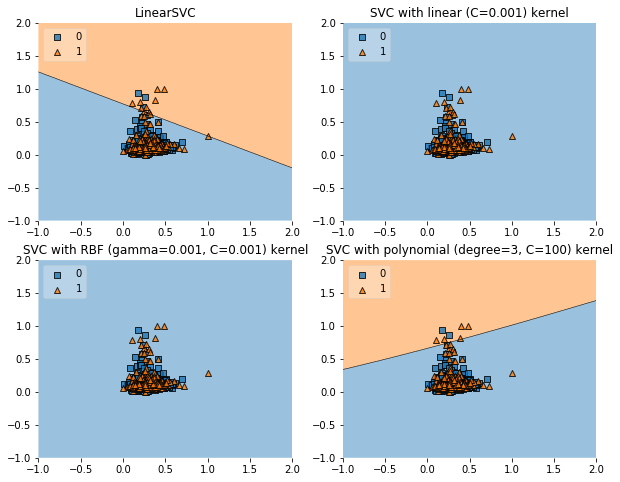

In [34]:
# Best parameters
import matplotlib.gridspec as gridspec
import itertools

clf1 = LinearSVC(C=10)
clf2 = SVC(kernel='linear', C=0.001)
clf3 = SVC(kernel='rbf', gamma=0.001, C=0.001)
clf4 = SVC(kernel='poly', degree=3, C=100)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['LinearSVC','SVC with linear (C=0.001) kernel','SVC with RBF (gamma=0.001, C=0.001) kernel','SVC with polynomial (degree=3, C=100) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,itertools.product([0, 1],repeat=2)):
    clf.fit(Xt, yt)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xt, y=yt,clf=clf, legend=2)
    plt.title(lab)

5. Decision Tree

In [35]:
# Gridsearch
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
param_DT = {"max_depth": range(1,10),"min_samples_split": range(2,50,1),"max_leaf_nodes": range(2,5)}
dtree_grid_search = GridSearchCV(dtree,param_DT,cv=5)
dtree_grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(dtree_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(dtree_grid_search.best_score_))

# Cross-validation
dtree_scores = cross_val_score(dtree, X_train, y_train, cv=5)
print("Average cross-validation score: {:.4f}".format(dtree_scores.mean()))

Best parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}
Best cross-validation score: 0.8508
Average cross-validation score: 0.7555


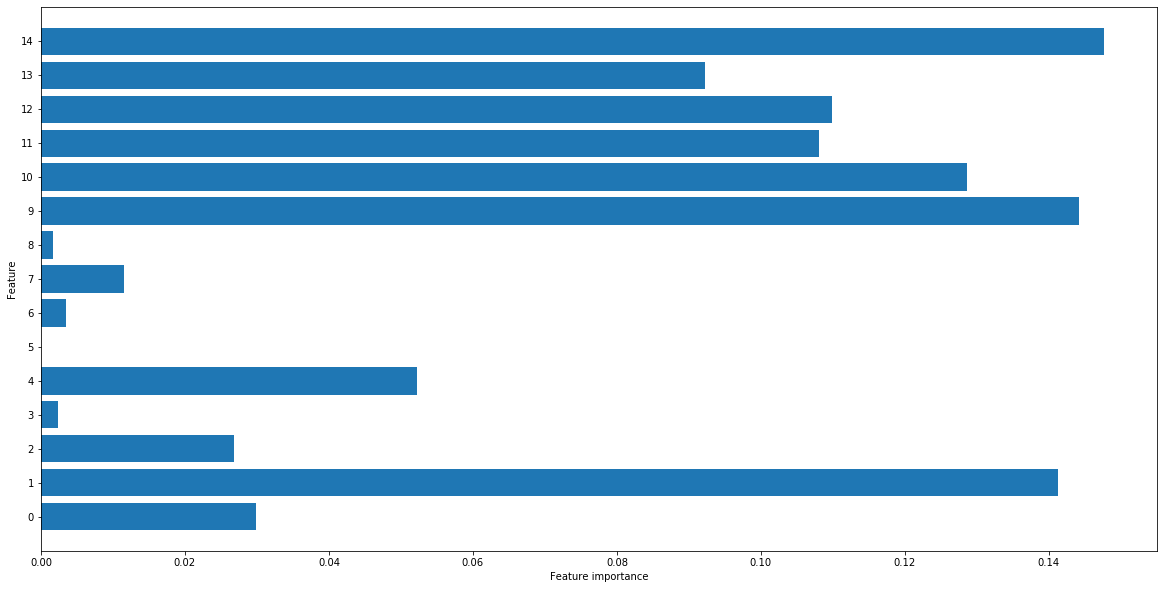

In [36]:
# Feature importances
dtree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
def plot_feature_importances_hd(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_hd(dtree)

Feature 14 (glucose) is the most important.

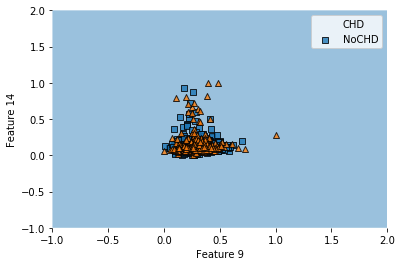

In [37]:
# Best parameters
dtree_best = DecisionTreeClassifier(random_state=0, max_depth=1, max_leaf_nodes=2, min_samples_split=2)
dtree_best.fit(Xt, yt)

plot_decision_regions(Xt, yt, clf=dtree_best)
plt.xlabel("Feature 9")
plt.ylabel("Feature 14")
plt.legend(['CHD', 'NoCHD'])

5. Model Evaluation

In [38]:
# Confusion matrix
pred_knn = KNeighborsClassifier(20).fit(X_train, y_train).predict(X_test)
pred_lreg = LogisticRegression(C=1, penalty='l1').fit(X_train, y_train).predict(X_test)
pred_Linearsvc = LinearSVC(C=10).fit(X_train, y_train).predict(X_test)
pred_rbf = SVC(kernel='rbf', C=0.001, gamma=0.001).fit(X_train, y_train).predict(X_test)
pred_poly = SVC(kernel='poly', C=100, degree=3).fit(X_train, y_train).predict(X_test)
pred_linear = SVC(kernel='linear', C=0.001).fit(X_train, y_train).predict(X_test)
pred_dtree = DecisionTreeClassifier(random_state=0, max_depth=1, max_leaf_nodes=2, min_samples_split=2).fit(X_train, y_train).predict(X_test)

print("\nKNN:")
print(confusion_matrix(y_test, pred_knn))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_lreg))
print("\nLinearSVC:")
print(confusion_matrix(y_test, pred_Linearsvc))
print("\nSVC kernel rbf:")
print(confusion_matrix(y_test, pred_rbf))
print("\nSVC kernel poly:")
print(confusion_matrix(y_test, pred_poly))
print("\nSVC kernel linear:")
print(confusion_matrix(y_test, pred_linear))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_dtree))


KNN:
[[890   0]
 [170   0]]

Logistic Regression
[[884   6]
 [160  10]]

LinearSVC:
[[887   3]
 [165   5]]

SVC kernel rbf:
[[890   0]
 [170   0]]

SVC kernel poly:
[[889   1]
 [167   3]]

SVC kernel linear:
[[890   0]
 [170   0]]

Decision tree:
[[890   0]
 [170   0]]


In [39]:
# Model scores
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 

dflist = [pred_knn, pred_lreg, pred_Linearsvc, pred_rbf, pred_poly, pred_linear, pred_dtree]

for j in dflist:
    print('Precision score: {:.4f}'.format(precision_score(y_test,j)))
    print('Recall score: {:.4f}'.format(recall_score(y_test,j)))
    print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,j)))
    print('F1 score: {:.4f}'.format(f1_score(y_test,j)))

Precision score: 0.0000
Recall score: 0.0000
Accuracy score: 0.8396
F1 score: 0.0000
Precision score: 0.6250
Recall score: 0.0588
Accuracy score: 0.8434
F1 score: 0.1075
Precision score: 0.6250
Recall score: 0.0294
Accuracy score: 0.8415
F1 score: 0.0562
Precision score: 0.0000
Recall score: 0.0000
Accuracy score: 0.8396
F1 score: 0.0000
Precision score: 0.7500
Recall score: 0.0176
Accuracy score: 0.8415
F1 score: 0.0345
Precision score: 0.0000
Recall score: 0.0000
Accuracy score: 0.8396
F1 score: 0.0000
Precision score: 0.0000
Recall score: 0.0000
Accuracy score: 0.8396
F1 score: 0.0000


In [40]:
# Result table
data = {'Model Selection':["KNN", "Logistic Regression", "LinearSVC", "SVC kernel rbf", "SVC kernel poly", "SVC kernel linear", "Decision Tree"],
        'Best parameters':[{'n_neighbors': 20, 'weights': 'uniform'},{'C': 1, 'penalty': 'l1'},{'C': 10},{'C': 0.001, 'gamma': 0.001},{'C': 100, 'degree': 3},{'C': 0.001},{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}],
       'Best cross-validation score':[0.8512, 0.8581, 0.8537, 0.8508, 0.8515, 0.8508, 0.8508],
       'Average cross-validation score':[0.8364, 0.8581, 0.8534, 0.8509, 0.8509, 0.8483, 0.7555],
       'Precision score':[0.0000, 0.6250, 0.6250, 0.0000, 0.7500, 0.0000, 0.0000],
       'Recall score':[0.0000, 0.0588, 0.0294, 0.0000, 0.0176, 0.0000, 0.0000],
        'Accuracy score':[0.8396, 0.8434, 0.8415, 0.8396, 0.8415, 0.8396, 0.8396],
       'F1 score':[0.0000, 0.1075, 0.0562, 0.0000, 0.0345, 0.0000, 0.0000],} 

df = pd.DataFrame(data) 
df.sort_values(['Best cross-validation score'], ascending=False)

,Model Selection,Best parameters,Best cross-validation score,Average cross-validation score,Precision score,Recall score,Accuracy score,F1 score
1,Logistic Regression,"{'C': 1, 'penalty': 'l1'}",0.8581,0.8581,0.625,0.0588,0.8434,0.1075
2,LinearSVC,{'C': 10},0.8537,0.8534,0.625,0.0294,0.8415,0.0562
4,SVC kernel poly,"{'C': 100, 'degree': 3}",0.8515,0.8509,0.750,0.0176,0.8415,0.0345
0,KNN,"{'n_neighbors': 20, 'weights': 'uniform'}",0.8512,0.8364,0.000,0.0000,0.8396,0.0000
3,SVC kernel rbf,"{'C': 0.001, 'gamma': 0.001}",0.8508,0.8509,0.000,0.0000,0.8396,0.0000
5,SVC kernel linear,{'C': 0.001},0.8508,0.8483,0.000,0.0000,0.8396,0.0000
6,Decision Tree,"{'max_depth': 1, 'max_leaf_nodes': 2, 'min_sam...",0.8508,0.7555,0.000,0.0000,0.8396,0.0000


The logistic regression model generated the highest scores according to the result table. Therefore, the logistic regression model with C=1 and penalty=l1 is selected.